# Ajustar dados esparsos à uma dada função
> Empregar o método dos mínimos quadrados para ajustar dados esparsos à uma função desejada é uma prática usual em diversas áreas. Quer aprender a fazer isso com poucas linhas de código em Python?

- toc: false
- badges: true
- comments: true
- author: Felipe N. Schuch
- image: images/curve-fitting.png
- categories: [SciPy,NumPy,Matplotlib]

Empregar o método dos mínimos quadrados para ajustar dados esparsos à uma função desejada é uma prática usual em diversas áreas, usualmente empregada para previsão de tenências ou como uma estimativa para uma faixa não coberta pelos dados coletados. O primeiro passo é importar Numpy para nos servir como estrutura de dados e Matplotlib para produção dos gráficos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#hide
# Aqui definimos o estilo das figuras
plt.style.use(['seaborn-darkgrid']) 

O segundo passo é ter acesso aos dados esparsos aos quais queremos ajustar uma função. Para fins didáticos, eles serão produzidos de maneira artifical como uma função cosseno \\( \text{datay}(x) = 2,9\cos( 1,5 x) \\), sendo \\( -6 \le x \le 6 \\), em adição a números aleatórios. Note que a semente (seed) foi fixada para garantir a reprodutibilidade da solução.

In [3]:
datax = np.linspace(-6, 6, num=60)
datay = 2.9 * np.cos(1.5 * datax)

np.random.seed(67)
datay += np.random.normal(size=datax.size)

Podemos graficar os nossos dados para conferência:

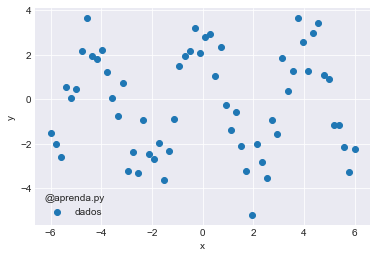

In [4]:
plt.scatter(datax, datay, label='dados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='@aprenda.py')
plt.show()

Usaremos a função [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), baseada no método dos mínimos quadrados não linear, assumindo que `ydata = f(xdata, *params) + eps`. Portanto, para fazer a ajuste para a funcão que queremos aqui \\( \text{fun}(x) = a\cos(bx) \\), usamos o seguinte código:

In [5]:
from scipy.optimize import curve_fit

def fun(x, a, b):
  '''
  Note que aqui podemos definir tanta complexidade quanto necessário para o
  problema em estudo, como: multiplas variáveis, laços "for", testes lógicos,
  entre outros. Entretanto, para o nosso exemplo, a linha a seguir é suficiente.
  '''
  return a * np.cos(b * x)

(a, b), c = curve_fit(fun, datax, datay)

#Imprimir os parâmetros de ajuste obtidos
print(f'a: {a}')
print(f'b: {b}')

sigma = np.sqrt(np.diag(c))
print(f'desvio padrão: {sigma}')

a: 2.876077234048122
b: 1.5008053610803145
desvio padrão: [0.19015469 0.01789528]


E assim obtivemos valores para as constantes de ajuste `a`, `b` e também para o desvio padrão de cada uma delas. Com isso, podemos aumentar a resolução de `datax` para `linex`, uma vez que agora temos uma função contínua que define nossos dados esparsos. Por fim, graficamos os resultados:

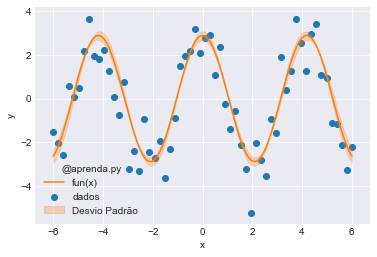

In [6]:
linex = np.linspace(datax[0],datax[-1], num=datax.size*4)

plt.figure()
plt.plot(linex, fun(linex, a, b),
         label='fun(x)', color='C1')
plt.scatter(datax, datay, label='dados')
plt.fill_between(linex,
                 fun(linex, a-sigma[0], b-sigma[1]),
                 fun(linex, a+sigma[0], b+sigma[1]),
                 color='C1', alpha=.25, label='Desvio Padrão')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='@aprenda.py')
plt.show()